In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from datetime import datetime
import numpy as np

In [3]:
# Get data
os.system("./get_data.sh")

0

Directory: data_52
Directory: data_42
Directory: data_12
Directory: data_60
Directory: data_55
Directory: data_36
Directory: data_14
Directory: data_13
Directory: data_32
Directory: data_11
Directory: data_63
Directory: data_51
Directory: data_18
Directory: data_45
Directory: data_31
Directory: data_33
Directory: data_29
Directory: data_62
Directory: data_41
Directory: data_58
Directory: data_23
Directory: data_38
Directory: data_5
Directory: data_44
Directory: data_10
Directory: data_39
Directory: data_40
Directory: data_4
Directory: data_16
Directory: data_64
Directory: data_27
Directory: data_8
Directory: data_15
Directory: data_34
Directory: data_57
Directory: data_2
Directory: data_46
Directory: data_30
Directory: data_61
Directory: data_1
Directory: data_59
Directory: data_53
Directory: data_25
Directory: data_19
Directory: data_3
Directory: data_7
Directory: data_22
data directory: data/data_22
f_name:  data/data_22/epi-server-5df6487784-x4ppt.txt


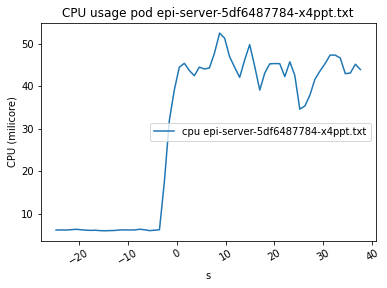

f_name:  data/data_22/epi-proxy-8459cd7964-kvg82.txt


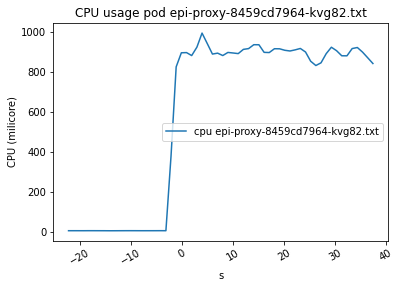

f_name:  data/data_22/epi-bf-55fc47fd8d-5d2h8.txt


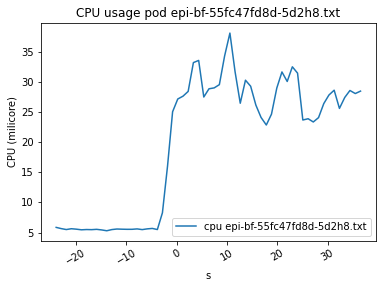

f_name:  data/data_22/locust-worker-788cd947d6-5b4bt.txt


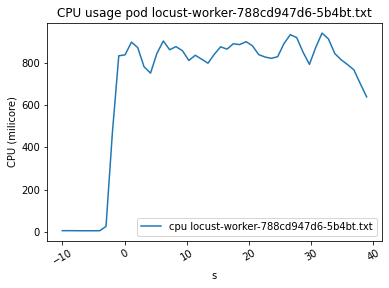

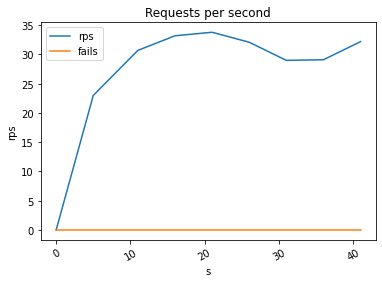

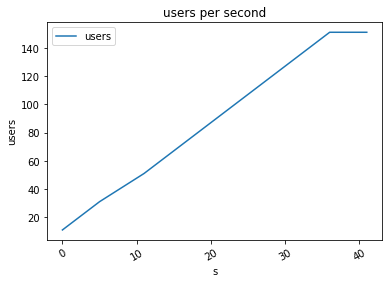

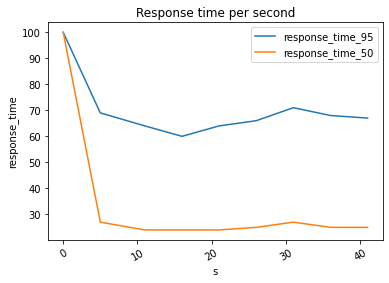

Directory: data_9
Directory: data_26
Directory: data_37
Directory: data_43
Directory: data_21
Directory: data_28
Directory: data_24
Directory: data_54
Directory: data_20
Directory: data_6
Directory: data_17
Directory: data_35
Directory: data_50
Directory: data_47
Directory: data_56
Directory: data_48
Directory: data_49


In [4]:
def get_time_in_s(x):
    x = x.split("T")[-1]
    x = datetime.strptime(x, '%H:%M:%S.%f')
    a_timedelta = x - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    return seconds

def get_time_date(x):
    x = x.split("T")[-1]
    x = datetime.strptime(x, '%H:%M:%S.%f')
    return x

def locust_get_time_in_s(x):
    a_timedelta = x - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    
    return seconds 

def locust_get_time(x):
    return datetime.strptime(x, "%H:%M:%S")

def plot_request_per_second(df_locust):
    plt.title("Requests per second")
    plt.plot(df_locust["Time_in_s"], df_locust["values"], label="rps")
    plt.plot(df_locust["Time_in_s"], df_locust["fails"], label="fails")
    plt.xlabel("s")
    plt.ylabel("rps")
    plt.xticks(rotation=30)
    plt.legend()
    plt.show()

def plot_users_per_second(df_locust):
    plt.title("users per second")
    plt.plot(df_locust["Time_in_s"], df_locust["users"], label="users")
    plt.xlabel("s")
    plt.ylabel("users")
    plt.xticks(rotation=30)
    plt.legend()
    plt.show()    
    

    
def plot_response_times_per_second(df_locust):
    plt.title("Response time per second")
    plt.plot(df_locust["Time_in_s"], df_locust["response_time_95"], label="response_time_95")
    plt.plot(df_locust["Time_in_s"], df_locust["response_time_50"], label="response_time_50")
    plt.xlabel("s")
    plt.ylabel("response_time")
    plt.xticks(rotation=30)
    plt.legend()
    plt.show()   
    
def plot_memory(df):
    plt.plot(df["Time_in_s"], df["Memory"])
    plt.xlabel("s")
    plt.xticks(rotation=30)
    plt.ylabel("Memory")
    plt.show()

def plot_cpu_per_pod(df, pod):
    plt.title(f"CPU usage pod {pod}")
        
    # Plot the cpu at a gradient of 1 precent, get microseconds of CPU per s (milicore)
    plt.plot(df["Time_in_s"], np.gradient(df["CPU"]), label=f"cpu {pod}")

#     if "proxy" in pod:
#         # Plot bf cpu request and limit
#         plt.axhline(int(PROXY_LIMITS_CPU.replace("m", "")), color="r", label=f"CPU limit {pod}")
#         plt.axhline(int(PROXY_REQUEST_CPU.replace("m", "")), color="g", label=f"CPU request{pod}")
        
#     if "server" in pod:
#         # Plot bf cpu request and limit
#         plt.axhline(int(SERVER_LIMITS_CPU.replace("m", "")), color="r", label=f"CPU limit {pod}")
#         plt.axhline(int(SERVER_REQUEST_CPU.replace("m", "")), color="g", label=f"CPU request{pod}") 
        
#     if "epi-bf" in pod:
#         # Plot bf cpu request and limit
#         plt.axhline(int(BF_LIMITS_CPU.replace("m", "")), color="r", label=f"CPU limit {pod}")
#         plt.axhline(int(BF_REQUEST_CPU.replace("m", "")), color="g", label=f"CPU request{pod}")

#     if "locust" in pod:
#         # Plot bf cpu request and limit
#         plt.axhline(int(CLIENT_LIMITS_CPU.replace("m", "")), color="r", label=f"locust CPU limit {pod}")
#         plt.axhline(int(CLIENT_REQUEST_CPU.replace("m", "")), color="g", label=f"locust request {pod}")


    plt.xlabel("s")
    plt.ylabel("CPU (milicore)")
    plt.xticks(rotation=30)
    plt.legend()
        
        
main_data_dir="data"

for d_name in os.listdir(main_data_dir):
    print("Directory:", d_name)
    if d_name != "data_22":
        continue
        
    data_directory = f"{main_data_dir}/{d_name}"
    print(f"data directory: {data_directory}")
    
    # Get locust data
    locust_csv = f"{data_directory}/locust_data.csv"
    df_locust = pd.read_csv(locust_csv)
    df_locust['time'] = df_locust['time'].apply(lambda x: locust_get_time(x))
    df_locust["Time_in_s"] = df_locust["time"].apply(lambda x: locust_get_time_in_s(x))
    # Start point to make everything start at zero seconds
    start_point = df_locust["Time_in_s"][0] 
    df_locust["Time_in_s"] = df_locust["Time_in_s"] -  start_point  


    # Get bf milicore data
    with open(f"{data_directory}/bf_milicore.txt") as f:
        for i, x in enumerate(f.readlines()):
            if i == 0:
                BF_LIMITS_CPU, BF_REQUEST_CPU, BF_LIMITS_MEM, BF_REQUEST_MEM = x.split(",")
            if i == 1:
                SERVER_LIMITS_CPU, SERVER_REQUEST_CPU, SERVER_LIMITS_MEM, SERVER_REQUEST_MEM = x.split(",")
            if i == 2:
                PROXY_LIMITS_CPU, PROXY_REQUEST_CPU, PROXY_LIMITS_MEM, PROXY_REQUEST_MEM = x.split(",")
            if i == 3:
                CLIENT_LIMITS_CPU, CLIENT_REQUEST_CPU, CLIENT_LIMITS_MEM, CLIENT_REQUEST_MEM = x.split(",")

        

    
    for pod in os.listdir(data_directory):
        if pod.startswith("locust_data") or pod.startswith("bf") or pod.startswith("locust_stat"):
            continue
        
        f_name = f"{data_directory}/" + pod
        print("f_name: ", f_name)
        
        df = pd.read_csv(f_name, delimiter=",")
        df = df.iloc[5:]
        df = df.reset_index()
        # Convert values 
        df["Time_in_s"] = df["Time"].apply(lambda x: get_time_in_s(x))
        # Locust has zero point
        df["Time_in_s"] = df["Time_in_s"] - start_point
        df["Time_datetime"] = df["Time"].apply(lambda x: get_time_date(x))
        # cpu is in nanosecond so dive by 1000 is microsecond divide by 100 is milicore
        df["CPU"] = (df["CPU"] / 1000) / 1000
        
        plot_cpu_per_pod(df, pod)
#         plot_memory(df)

#         plt.ylim(0, 20)
        plt.show()

    plot_request_per_second(df_locust)
    plot_users_per_second(df_locust)
    plot_response_times_per_second(df_locust)

    exit(1)